In [17]:
from sklearn.metrics import roc_curve, precision_recall_curve
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
def get_sk2_pred_socre(fn):
    site2socre = dict()
    with open(fn, 'r') as f:
        for line in f:
            if line.startswith('#'): continue
            CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR = line.split('\t')
            for tmp in INFO.split(';'):
                if tmp.startswith('SomaticEVS'):
                    evs_score = tmp.strip()
            evs_score = evs_score.split('=')[-1].strip()
            evs_score = float(evs_score)
            site2socre[':'.join([CHROM, POS, REF, ALT])] = evs_score
    return site2socre

def get_rv_pred_score(fn):
    site2socre = dict()
    with open(fn, 'r') as f:
        for line in f:
            if line.startswith('#'): continue
            CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR = line.split('\t')
            for tmp in INFO.split(';'):
                if tmp.startswith('RFV'):
                    evs_score = tmp.strip()
            evs_score = evs_score.split('=')[-1].strip()
            evs_score = float(evs_score)
            site2socre[':'.join([CHROM, POS, REF, ALT])] = evs_score
    return site2socre 


274785


length of truth vars is: 59978


No handles with labels found to put in legend.


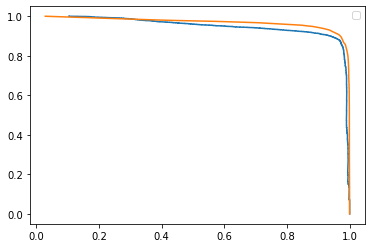

In [24]:
def get_truth(truth_file):
    truth_vars = set()
    with open(truth_file, 'r') as f:
        for var in f:
            if var[0] == '#': continue
            items = var.split('\t')
            chrom, pos, id, ref, alt, _, filter = items[:7]
            #if len(chrom) < 6 and filter == "PASS" and (len(ref) > 1 or len(alt) > 1) :
            if (filter.find('PASS') == -1) and (filter.strip() != '.') :
                #print('pass:', filter.strip())
                continue
            if len(chrom) < 6:
                site = chrom + ":" + pos + ":" + ref + ":" + alt
                truth_vars.add(site)
    return truth_vars

def get_label(truth_vars, key):
    if key in truth_vars:
        return 1
    else :
        return 0
    return 0

def plot_prec_recall_curve(tmp):
    data = pd.DataFrame()
    data['site'] = tmp.keys()
    data['pred'] = tmp.values()
    data['truth'] = data.apply(rabv_get_label, axis = 1)
    precision, recall, thresholds = precision_recall_curve(data['truth'],data['pred'])
    plt.plot(recall, precision)


truth_file = "/home/user_home/data_share/sync_octupus/Truth/NA24631.PACA.hg38.sort.vcf"
truth_vars = get_truth(truth_file)
print('length of truth vars is:', len(truth_vars))

def rabv_get_label(x):
    return get_label(truth_vars, str(x['site']))
#-----construct strelka2 result------#
# tmp1 = get_rv_pred_score("/home/user_home/haoz/workspace/RabbitVar/RandomForest/validate/indel.vcf")
# plot_prec_recall_curve(tmp1)
# tmp2 = get_sk2_pred_socre("/home/large/haoz/data/bcbio_bench_result/octopus_sync_PACA/final_strelka2/OCT_NA24631_T/OCT_NA24631_T-strelka2.vcf")
# plot_prec_recall_curve(tmp2)
# plt.legend()
# plt.show()

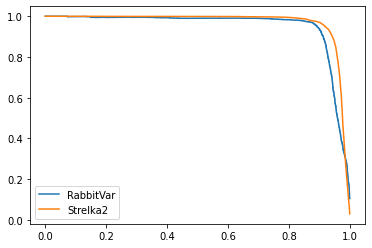

In [26]:
def plot_prec_recall_curve(tmp, label):
    data = pd.DataFrame()
    data['site'] = tmp.keys()
    data['pred'] = tmp.values()
    data['truth'] = data.apply(rabv_get_label, axis = 1)
    precision, recall, thresholds = precision_recall_curve(data['truth'],data['pred'])
    plt.plot(recall, precision, label = label)
    plt.legend()
plt.xlabel('Recall')    
plt.ylabel('Precision(Indels)')
plot_prec_recall_curve(tmp1, 'RabbitVar')
plot_prec_recall_curve(tmp2, 'Strelka2')
plt.show()

In [28]:
print(precision)
print(recall)

[0.10409635 0.104081   0.10408279 ... 1.         1.         1.        ]
[1.00000000e+00 9.99835418e-01 9.99835418e-01 ... 3.29163924e-04
 1.64581962e-04 0.00000000e+00]
